In [30]:
import numpy as np
import pandas as pd
import matplotlib as plt
import io

from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score

In [31]:
# loading data
file_path="Resources/FoodAccess2019HousingPrice_All.csv"
foodAccess_df=pd.read_csv(file_path, index_col=False)
foodAccess_df.head()

,Urban,Pop2010,OHU2010,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,LowIncomeTracts,PovertyRate,LAhalfand10,LA1and20,...,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,ZScore_EstMedVal
0,1,2937,1314,0,0,0,0,3.6,1,1,...,2161.0,142.0,456.0,9.0,4.0,165.0,117.0,28.0,0.0,1.961698
1,1,1974,856,0,0,0,0,6.5,0,0,...,1659.0,33.0,147.0,0.0,4.0,131.0,151.0,59.0,0.0,2.539102
2,1,4865,2418,0,0,0,0,5.3,1,0,...,3468.0,518.0,423.0,5.0,17.0,434.0,399.0,423.0,38.0,1.516096
3,1,3703,1779,0,0,0,0,11.3,0,0,...,2628.0,456.0,278.0,6.0,14.0,321.0,332.0,157.0,115.0,1.695938
4,1,3517,1578,0,0,0,0,11.9,1,0,...,1905.0,955.0,209.0,5.0,27.0,416.0,340.0,188.0,51.0,0.778867


In [32]:
#Create DataFrame
foodAccess_2019=pd.DataFrame(foodAccess_df)

In [33]:
#copy DataFrame
new_foodAccess_df=foodAccess_2019.copy()
new_foodAccess_df.head()

,Urban,Pop2010,OHU2010,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,LowIncomeTracts,PovertyRate,LAhalfand10,LA1and20,...,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,ZScore_EstMedVal
0,1,2937,1314,0,0,0,0,3.6,1,1,...,2161.0,142.0,456.0,9.0,4.0,165.0,117.0,28.0,0.0,1.961698
1,1,1974,856,0,0,0,0,6.5,0,0,...,1659.0,33.0,147.0,0.0,4.0,131.0,151.0,59.0,0.0,2.539102
2,1,4865,2418,0,0,0,0,5.3,1,0,...,3468.0,518.0,423.0,5.0,17.0,434.0,399.0,423.0,38.0,1.516096
3,1,3703,1779,0,0,0,0,11.3,0,0,...,2628.0,456.0,278.0,6.0,14.0,321.0,332.0,157.0,115.0,1.695938
4,1,3517,1578,0,0,0,0,11.9,1,0,...,1905.0,955.0,209.0,5.0,27.0,416.0,340.0,188.0,51.0,0.778867


In [34]:
new_foodAccess_df.columns

Index(['Urban', 'Pop2010', 'OHU2010', 'LILATracts_halfAnd10',
       'LILATracts_1And20', 'LILATracts_Vehicle', 'LowIncomeTracts',
       'PovertyRate', 'LAhalfand10', 'LA1and20', 'LATracts1',
       'LATractsVehicle_20', 'TractLOWI', 'TractWhite', 'TractBlack',
       'TractAsian', 'TractNHOPI', 'TractAIAN', 'TractOMultir',
       'TractHispanic', 'TractHUNV', 'TractSNAP', 'ZScore_EstMedVal'],
      dtype='object')

<IPython.core.display.Javascript object>


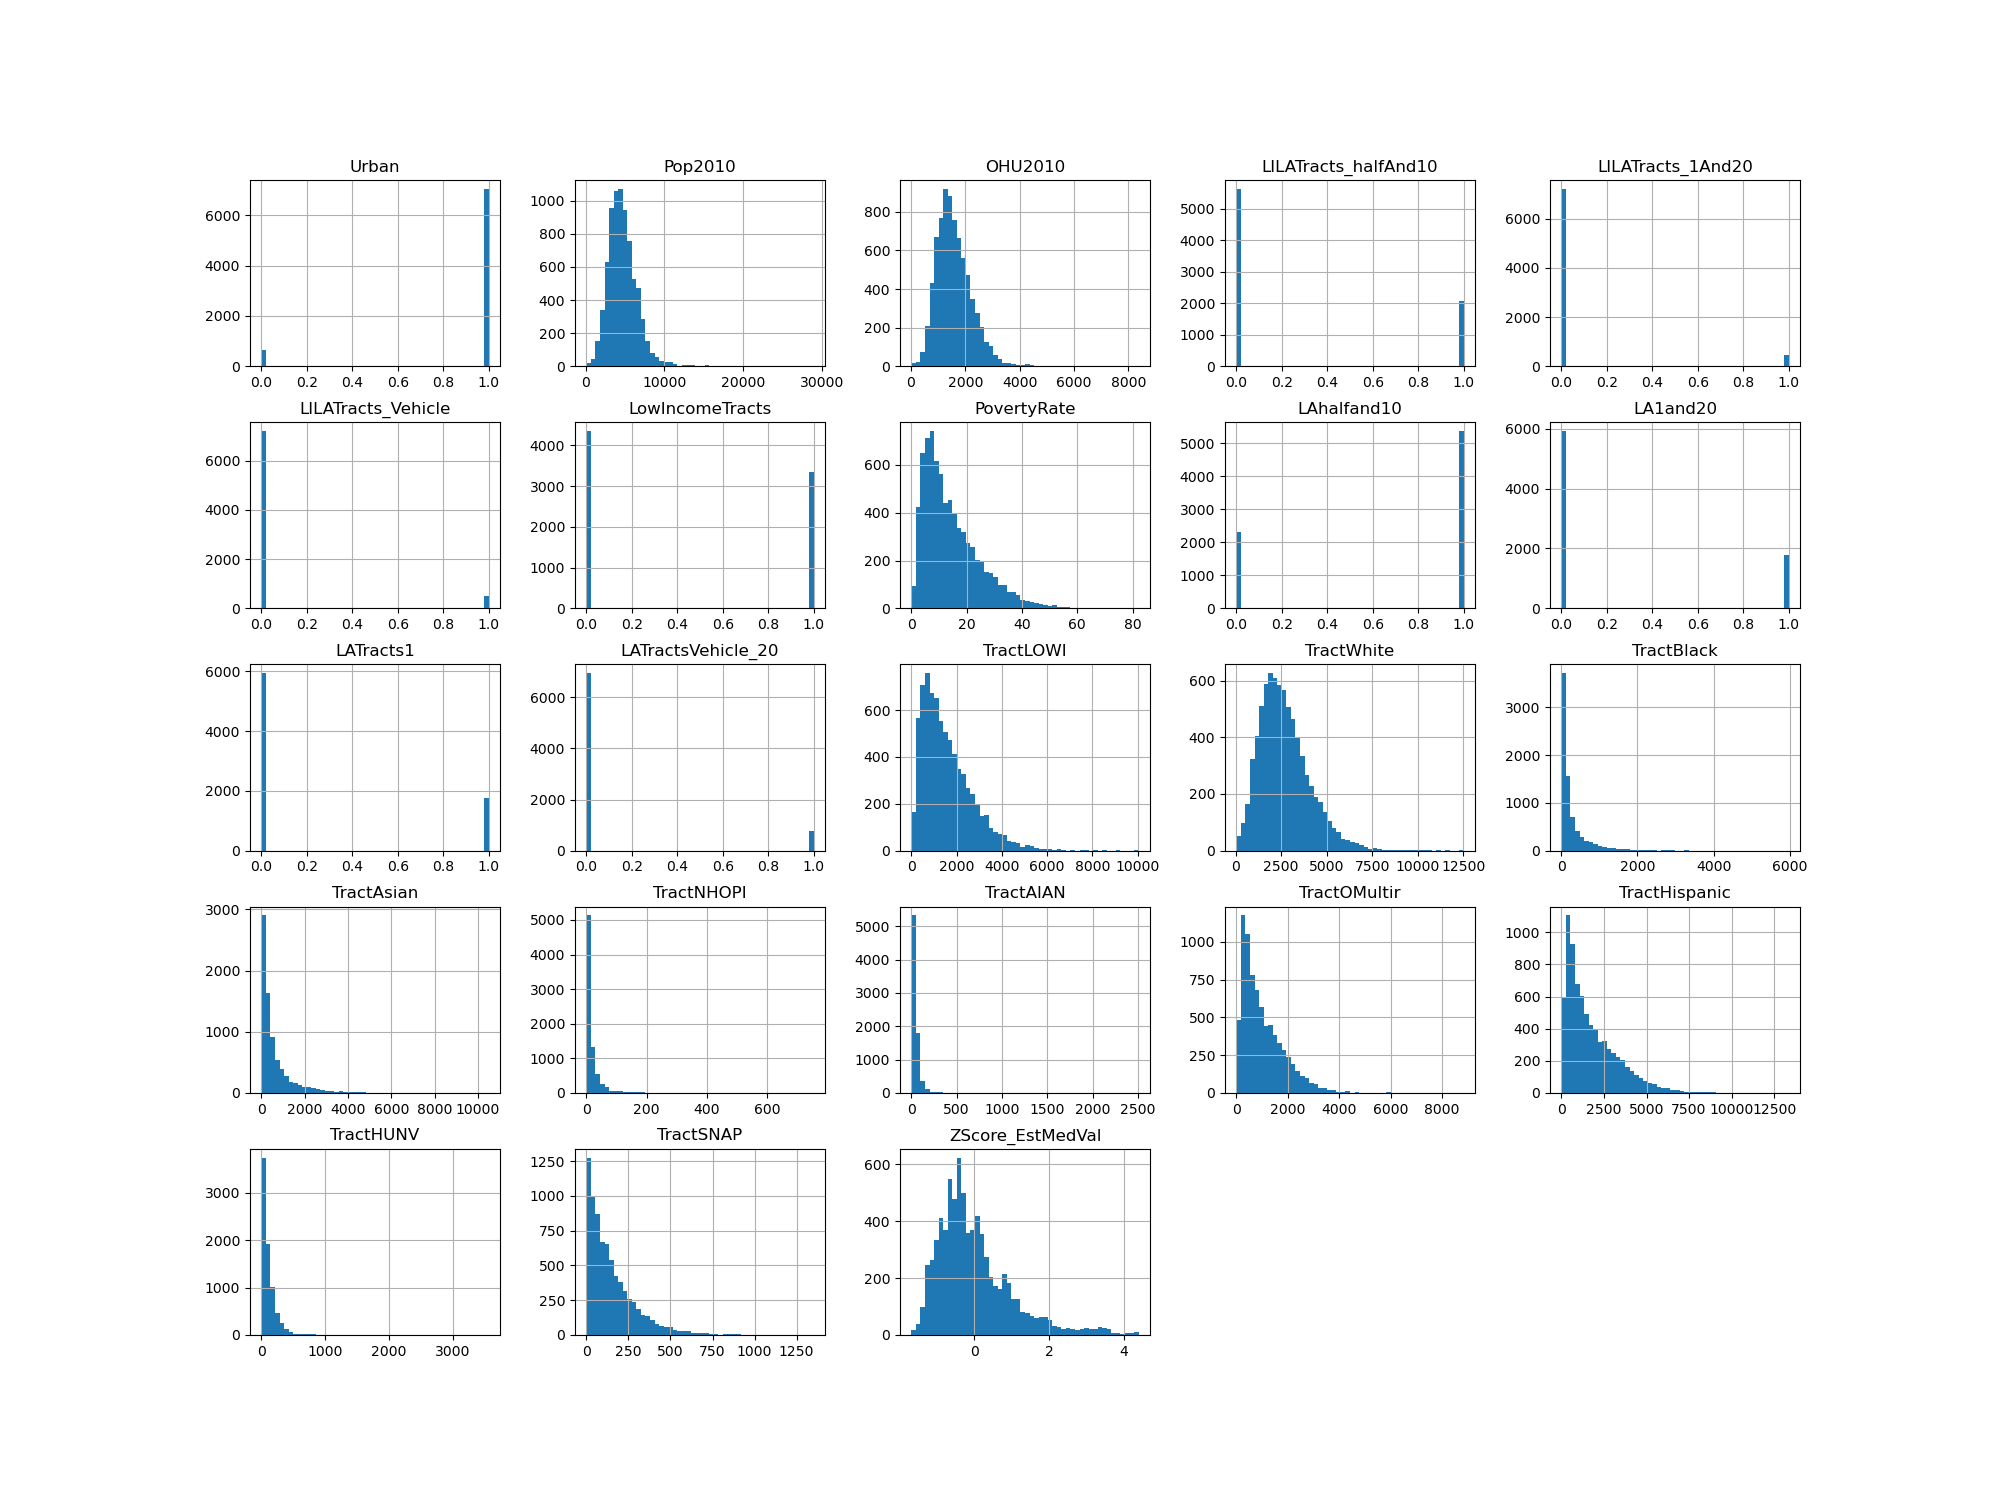

In [35]:
%matplotlib notebook
import matplotlib.pyplot as plt
new_foodAccess_df.hist(bins=50, figsize=(20,15))
plt.show()


<IPython.core.display.Javascript object>


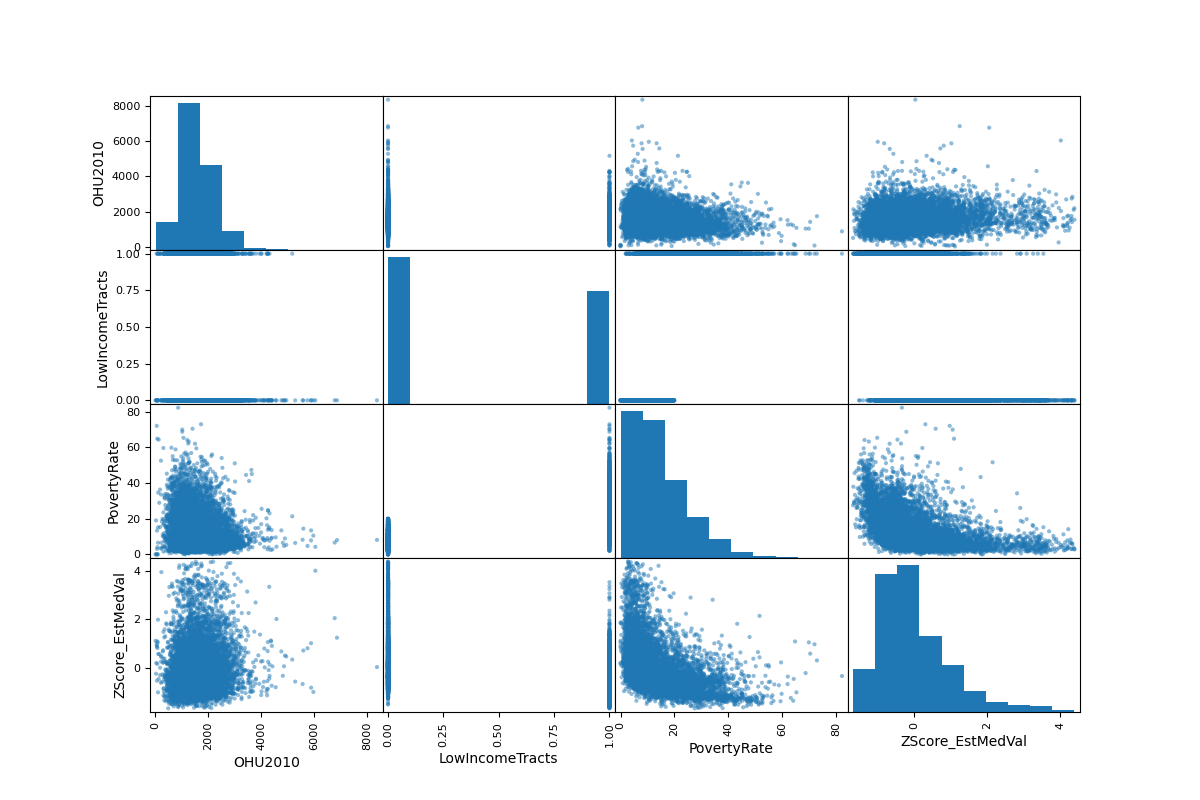

array([[<AxesSubplot:xlabel='OHU2010', ylabel='OHU2010'>,
        <AxesSubplot:xlabel='LowIncomeTracts', ylabel='OHU2010'>,
        <AxesSubplot:xlabel='PovertyRate', ylabel='OHU2010'>,
        <AxesSubplot:xlabel='ZScore_EstMedVal', ylabel='OHU2010'>],
       [<AxesSubplot:xlabel='OHU2010', ylabel='LowIncomeTracts'>,
        <AxesSubplot:xlabel='LowIncomeTracts', ylabel='LowIncomeTracts'>,
        <AxesSubplot:xlabel='PovertyRate', ylabel='LowIncomeTracts'>,
        <AxesSubplot:xlabel='ZScore_EstMedVal', ylabel='LowIncomeTracts'>],
       [<AxesSubplot:xlabel='OHU2010', ylabel='PovertyRate'>,
        <AxesSubplot:xlabel='LowIncomeTracts', ylabel='PovertyRate'>,
        <AxesSubplot:xlabel='PovertyRate', ylabel='PovertyRate'>,
        <AxesSubplot:xlabel='ZScore_EstMedVal', ylabel='PovertyRate'>],
       [<AxesSubplot:xlabel='OHU2010', ylabel='ZScore_EstMedVal'>,
        <AxesSubplot:xlabel='LowIncomeTracts', ylabel='ZScore_EstMedVal'>,
        <AxesSubplot:xlabel='PovertyRate', ylabe

In [36]:
from pandas.plotting import scatter_matrix
colist=new_foodAccess_df.filter(['POP2010', 'OHU2010','LowIncomeTracts','PovertyRate','ZScore_EstMedVal'],axis=1)
attributes = list(colist)

scatter_matrix(new_foodAccess_df[attributes], figsize=(12, 8))

<IPython.core.display.Javascript object>


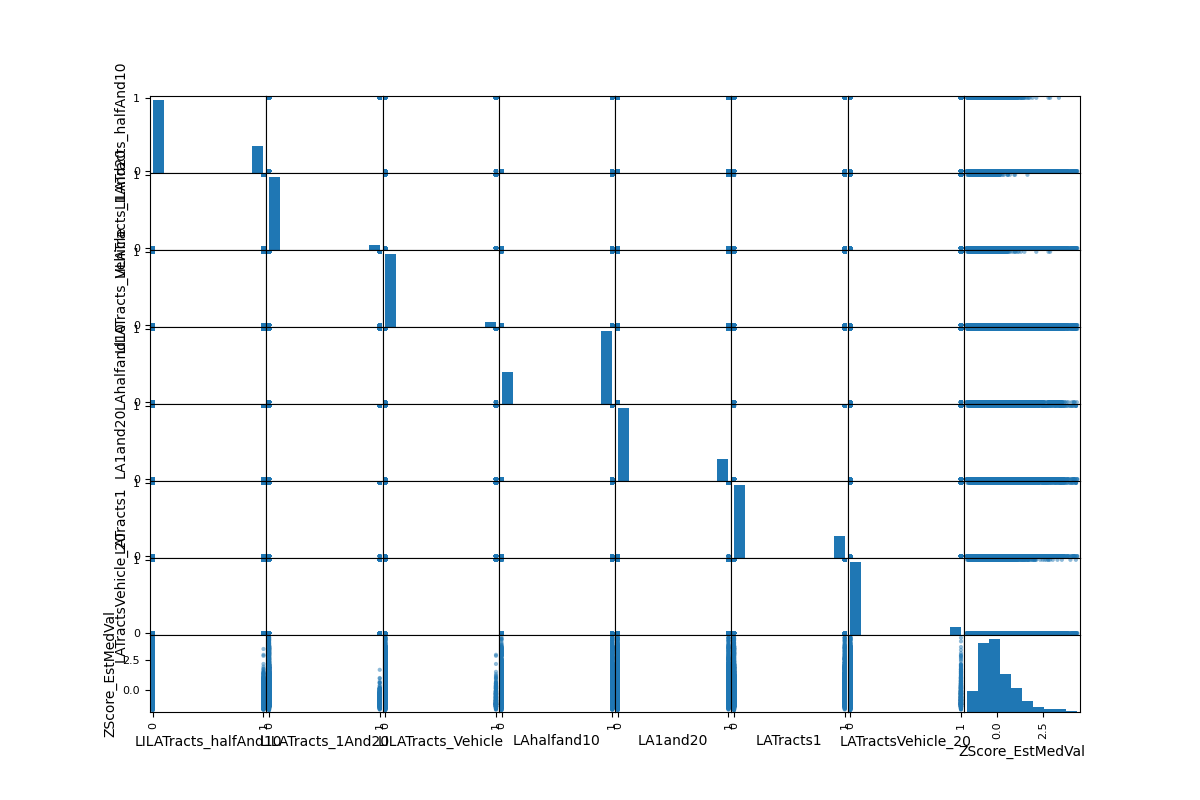

array([[<AxesSubplot:xlabel='LILATracts_halfAnd10', ylabel='LILATracts_halfAnd10'>,
        <AxesSubplot:xlabel='LILATracts_1And20', ylabel='LILATracts_halfAnd10'>,
        <AxesSubplot:xlabel='LILATracts_Vehicle', ylabel='LILATracts_halfAnd10'>,
        <AxesSubplot:xlabel='LAhalfand10', ylabel='LILATracts_halfAnd10'>,
        <AxesSubplot:xlabel='LA1and20', ylabel='LILATracts_halfAnd10'>,
        <AxesSubplot:xlabel='LATracts1', ylabel='LILATracts_halfAnd10'>,
        <AxesSubplot:xlabel='LATractsVehicle_20', ylabel='LILATracts_halfAnd10'>,
        <AxesSubplot:xlabel='ZScore_EstMedVal', ylabel='LILATracts_halfAnd10'>],
       [<AxesSubplot:xlabel='LILATracts_halfAnd10', ylabel='LILATracts_1And20'>,
        <AxesSubplot:xlabel='LILATracts_1And20', ylabel='LILATracts_1And20'>,
        <AxesSubplot:xlabel='LILATracts_Vehicle', ylabel='LILATracts_1And20'>,
        <AxesSubplot:xlabel='LAhalfand10', ylabel='LILATracts_1And20'>,
        <AxesSubplot:xlabel='LA1and20', ylabel='LILATracts_1

In [37]:
colist=new_foodAccess_df.filter(['LILATracts_halfAnd10',
       'LILATracts_1And20', 'LILATracts_Vehicle','LAhalfand10', 'LA1and20', 'LATracts1',
       'LATractsVehicle_20',  'ZScore_EstMedVal'],axis=1)
attributes = list(colist)

scatter_matrix(new_foodAccess_df[attributes], figsize=(12, 8))

<IPython.core.display.Javascript object>


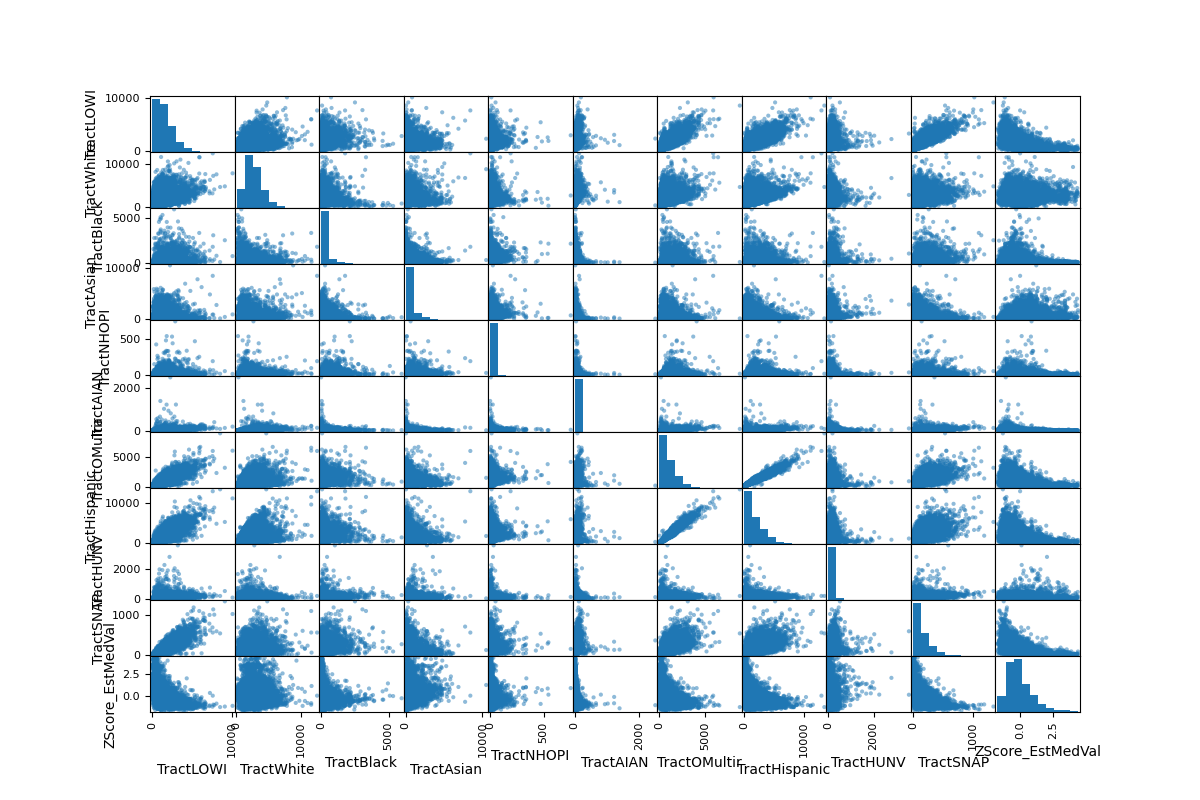

array([[<AxesSubplot:xlabel='TractLOWI', ylabel='TractLOWI'>,
        <AxesSubplot:xlabel='TractWhite', ylabel='TractLOWI'>,
        <AxesSubplot:xlabel='TractBlack', ylabel='TractLOWI'>,
        <AxesSubplot:xlabel='TractAsian', ylabel='TractLOWI'>,
        <AxesSubplot:xlabel='TractNHOPI', ylabel='TractLOWI'>,
        <AxesSubplot:xlabel='TractAIAN', ylabel='TractLOWI'>,
        <AxesSubplot:xlabel='TractOMultir', ylabel='TractLOWI'>,
        <AxesSubplot:xlabel='TractHispanic', ylabel='TractLOWI'>,
        <AxesSubplot:xlabel='TractHUNV', ylabel='TractLOWI'>,
        <AxesSubplot:xlabel='TractSNAP', ylabel='TractLOWI'>,
        <AxesSubplot:xlabel='ZScore_EstMedVal', ylabel='TractLOWI'>],
       [<AxesSubplot:xlabel='TractLOWI', ylabel='TractWhite'>,
        <AxesSubplot:xlabel='TractWhite', ylabel='TractWhite'>,
        <AxesSubplot:xlabel='TractBlack', ylabel='TractWhite'>,
        <AxesSubplot:xlabel='TractAsian', ylabel='TractWhite'>,
        <AxesSubplot:xlabel='TractNHOPI', yl

In [38]:
colist=new_foodAccess_df.filter(['TractLOWI', 'TractWhite', 'TractBlack',
       'TractAsian', 'TractNHOPI', 'TractAIAN', 'TractOMultir',
       'TractHispanic', 'TractHUNV', 'TractSNAP',  'ZScore_EstMedVal'],axis=1)
attributes = list(colist)

scatter_matrix(new_foodAccess_df[attributes], figsize=(12, 8))

In [39]:
#Method2 Machine learning: linear regression
##create variables
X=new_foodAccess_df.drop(columns=["ZScore_EstMedVal"], axis=1)
X

,Urban,Pop2010,OHU2010,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,LowIncomeTracts,PovertyRate,LAhalfand10,LA1and20,...,TractLOWI,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1,2937,1314,0,0,0,0,3.6,1,1,...,312.0,2161.0,142.0,456.0,9.0,4.0,165.0,117.0,28.0,0.0
1,1,1974,856,0,0,0,0,6.5,0,0,...,230.0,1659.0,33.0,147.0,0.0,4.0,131.0,151.0,59.0,0.0
2,1,4865,2418,0,0,0,0,5.3,1,0,...,526.0,3468.0,518.0,423.0,5.0,17.0,434.0,399.0,423.0,38.0
3,1,3703,1779,0,0,0,0,11.3,0,0,...,802.0,2628.0,456.0,278.0,6.0,14.0,321.0,332.0,157.0,115.0
4,1,3517,1578,0,0,0,0,11.9,1,0,...,809.0,1905.0,955.0,209.0,5.0,27.0,416.0,340.0,188.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7684,0,10879,3320,0,0,0,0,8.3,0,0,...,2757.0,7103.0,565.0,856.0,103.0,157.0,2095.0,2759.0,86.0,208.0
7685,0,4233,1492,0,0,0,0,10.3,0,0,...,983.0,3289.0,44.0,213.0,5.0,77.0,605.0,713.0,58.0,108.0
7686,0,2783,968,0,0,0,1,25.4,0,0,...,1210.0,1997.0,31.0,297.0,2.0,75.0,381.0,476.0,20.0,199.0
7687,0,7357,2802,0,0,0,0,8.1,0,0,...,1497.0,6179.0,57.0,181.0,9.0,156.0,775.0,916.0,43.0,188.0


In [40]:
y=new_foodAccess_df["ZScore_EstMedVal"]
y

0       1.961698
1       2.539102
2       1.516096
3       1.695938
4       0.778867
          ...   
7684   -0.799678
7685   -0.885595
7686   -1.043265
7687   -0.648167
7688   -0.938254
Name: ZScore_EstMedVal, Length: 7689, dtype: float64

In [41]:
X.describe()

,Urban,Pop2010,OHU2010,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,LowIncomeTracts,PovertyRate,LAhalfand10,LA1and20,...,TractLOWI,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
count,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.00000,7689.000000,...,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000
mean,0.916114,4690.366107,1586.831187,0.268565,0.061907,0.063857,0.434127,14.503238,0.69866,0.230589,...,1586.481467,2694.396801,286.671219,610.506958,18.380804,46.164911,1034.245416,1785.636624,115.047861,151.331513
std,0.277235,1909.167333,660.000300,0.443242,0.241002,0.244515,0.495674,10.383323,0.45887,0.421237,...,1130.163082,1387.799009,447.645523,813.827050,31.738573,60.263192,823.709206,1541.669917,152.119817,147.308969
min,0.000000,71.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,43.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,0.000000,0.000000
25%,1.000000,3412.000000,1123.000000,0.000000,0.000000,0.000000,0.000000,6.600000,0.00000,0.000000,...,731.000000,1692.000000,54.000000,124.000000,4.000000,19.000000,400.000000,593.000000,33.000000,45.000000
50%,1.000000,4454.000000,1488.000000,0.000000,0.000000,0.000000,0.000000,11.700000,1.00000,0.000000,...,1314.000000,2487.000000,126.000000,315.000000,9.000000,35.000000,799.000000,1308.000000,74.000000,110.000000
75%,1.000000,5687.000000,1954.000000,1.000000,0.000000,0.000000,1.000000,20.000000,1.00000,0.000000,...,2182.000000,3448.000000,311.000000,738.000000,21.000000,57.000000,1477.000000,2589.000000,149.000000,213.000000
max,1.000000,28960.000000,8382.000000,1.000000,1.000000,1.000000,1.000000,82.200000,1.00000,1.000000,...,10040.000000,12514.000000,5971.000000,10485.000000,755.000000,2506.000000,8839.000000,13341.000000,3563.000000,1351.000000


In [42]:
X.dtypes

Urban                     int64
Pop2010                   int64
OHU2010                   int64
LILATracts_halfAnd10      int64
LILATracts_1And20         int64
LILATracts_Vehicle        int64
LowIncomeTracts           int64
PovertyRate             float64
LAhalfand10               int64
LA1and20                  int64
LATracts1                 int64
LATractsVehicle_20        int64
TractLOWI               float64
TractWhite              float64
TractBlack              float64
TractAsian              float64
TractNHOPI              float64
TractAIAN               float64
TractOMultir            float64
TractHispanic           float64
TractHUNV               float64
TractSNAP               float64
dtype: object

In [43]:
#continous variabel scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_continous=X.filter(['Pop2010', 'OHU2010', 
       'PovertyRate',  'TractLOWI', 'TractWhite', 'TractBlack',
       'TractAsian', 'TractNHOPI', 'TractAIAN', 'TractOMultir',
       'TractHispanic', 'TractHUNV', 'TractSNAP'], axis=1)

X[X_continous.columns] = sc.fit_transform(X_continous)
X



,Urban,Pop2010,OHU2010,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,LowIncomeTracts,PovertyRate,LAhalfand10,LA1and20,...,TractLOWI,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1,-0.918453,-0.413407,0,0,0,0,-1.050140,1,1,...,-1.127770,-0.384372,-0.323204,-0.189865,-0.295584,-0.699725,-1.055351,-1.082427,-0.572269,-1.027374
1,1,-1.422894,-1.107391,0,0,0,0,-0.770828,0,0,...,-1.200331,-0.746120,-0.566716,-0.569577,-0.579169,-0.699725,-1.096630,-1.060372,-0.368469,-1.027374
2,1,0.091477,1.259428,0,0,0,0,-0.886406,1,0,...,-0.938405,0.557468,0.516801,-0.230416,-0.421622,-0.483990,-0.728758,-0.899497,2.024537,-0.769396
3,1,-0.517205,0.291184,0,0,0,0,-0.308518,0,0,...,-0.694176,-0.047846,0.378290,-0.408599,-0.390112,-0.533775,-0.865951,-0.942959,0.275801,-0.246651
4,1,-0.614636,-0.013381,0,0,0,0,-0.250730,1,0,...,-0.687982,-0.568849,1.493084,-0.493389,-0.421622,-0.318041,-0.750612,-0.937769,0.479601,-0.681140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7684,0,3.241746,2.626183,0,0,0,0,-0.597462,0,0,...,1.035775,3.176894,0.621802,0.301672,2.666304,1.839303,1.287862,0.631411,-0.190966,0.384716
7685,0,-0.239579,-0.143693,0,0,0,0,-0.404833,0,0,...,-0.534012,0.428478,-0.542141,-0.488473,-0.421622,0.511707,-0.521147,-0.695808,-0.375044,-0.294173
7686,0,-0.999122,-0.937684,0,0,0,1,1.049517,0,0,...,-0.333143,-0.502553,-0.571184,-0.385251,-0.516150,0.478517,-0.793105,-0.849547,-0.624863,0.323616
7687,0,1.396843,1.841284,0,0,0,0,-0.616725,0,0,...,-0.079181,2.511048,-0.513098,-0.527796,-0.295584,1.822708,-0.314750,-0.564124,-0.473657,0.248938


In [44]:

# Fit and transform the get.dummies using the categorical variable list
X=pd.get_dummies(X, columns=['Urban', 'LILATracts_halfAnd10',
       'LILATracts_1And20', 'LILATracts_Vehicle', 'LowIncomeTracts',
      'LAhalfand10', 'LA1and20', 'LATracts1',
       'LATractsVehicle_20', ])
X

,Pop2010,OHU2010,PovertyRate,TractLOWI,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,...,LowIncomeTracts_0,LowIncomeTracts_1,LAhalfand10_0,LAhalfand10_1,LA1and20_0,LA1and20_1,LATracts1_0,LATracts1_1,LATractsVehicle_20_0,LATractsVehicle_20_1
0,-0.918453,-0.413407,-1.050140,-1.127770,-0.384372,-0.323204,-0.189865,-0.295584,-0.699725,-1.055351,...,1,0,0,1,0,1,0,1,1,0
1,-1.422894,-1.107391,-0.770828,-1.200331,-0.746120,-0.566716,-0.569577,-0.579169,-0.699725,-1.096630,...,1,0,1,0,1,0,1,0,1,0
2,0.091477,1.259428,-0.886406,-0.938405,0.557468,0.516801,-0.230416,-0.421622,-0.483990,-0.728758,...,1,0,0,1,1,0,1,0,0,1
3,-0.517205,0.291184,-0.308518,-0.694176,-0.047846,0.378290,-0.408599,-0.390112,-0.533775,-0.865951,...,1,0,1,0,1,0,1,0,1,0
4,-0.614636,-0.013381,-0.250730,-0.687982,-0.568849,1.493084,-0.493389,-0.421622,-0.318041,-0.750612,...,1,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7684,3.241746,2.626183,-0.597462,1.035775,3.176894,0.621802,0.301672,2.666304,1.839303,1.287862,...,1,0,1,0,1,0,1,0,1,0
7685,-0.239579,-0.143693,-0.404833,-0.534012,0.428478,-0.542141,-0.488473,-0.421622,0.511707,-0.521147,...,1,0,1,0,1,0,1,0,1,0
7686,-0.999122,-0.937684,1.049517,-0.333143,-0.502553,-0.571184,-0.385251,-0.516150,0.478517,-0.793105,...,0,1,1,0,1,0,1,0,1,0
7687,1.396843,1.841284,-0.616725,-0.079181,2.511048,-0.513098,-0.527796,-0.295584,1.822708,-0.314750,...,1,0,1,0,1,0,1,0,1,0


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [46]:
#cross validation

In [47]:
print(len(X_train), "train +", len(X_test), "test")


6151 train + 1538 test


In [48]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [49]:
regressor.score(X_train, y_train)

0.4330878252221675

In [50]:
y_pred = regressor.predict(X_test)

In [51]:
df_lin_reg = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df_lin_reg

,Real Values,Predicted Values
971,-1.299786,-0.583052
6123,1.890254,0.956813
5356,-1.015857,-1.183266
4961,0.148496,0.654941
4733,-0.643548,0.349441
...,...,...
47,1.466824,0.567592
4542,-1.048500,-0.259073
3591,0.510336,0.469690
4423,-0.664796,-0.130392


In [52]:
#Calculating error metric
rmse_linreg = np.sqrt(mean_squared_error(y_test,y_pred))
r2_linreg = r2_score(y_test,y_pred)
print('LinearRegression Based RMSE is  ' + str(rmse_linreg))
print('LinearRegression Based r2 is  ' +str(r2_linreg))

LinearRegression Based RMSE is  0.7654232814383976
LinearRegression Based r2 is  0.4384206189684592


In [53]:
##method3 polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [55]:
poly=PolynomialFeatures(2)
X_poly=poly.fit_transform(X)

In [56]:
X_poly.shape

(7689, 528)

In [57]:
pca=PCA(n_components=80, random_state=1000)

In [ ]:
X_pca=pca.fit_transform(X_poly)
print(X_pca.shape)
print(type(X_pca))

In [ ]:
print("explian the variance explained by principal components: ")
pca.explained_variance_ratio_*100

In [ ]:
sum(pca.explained_variance_ratio_*100)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2)

In [36]:
lin_regpoly = LinearRegression()
lin_regpoly.fit(X_train, y_train)

LinearRegression()

In [37]:
lin_regpoly.score(X_train, y_train)

0.7096257458487492

In [38]:
lin_regpoly.score(X_test, y_test)

0.6508595646001607

In [39]:
y_pred = lin_regpoly.predict(X_pca)

In [40]:
df_polynom = pd.DataFrame({'Real Values':y, 'Predicted Values':y_pred})
df_polynom

,Real Values,Predicted Values
0,2.416889,4.056380
1,1.682202,2.638785
2,1.541934,1.659285
3,1.400941,0.921775
4,0.652844,0.468859
...,...,...
7768,-0.856036,-0.586467
7769,-0.910041,-0.300268
7770,-0.842263,-0.542050
7771,-0.553752,-0.487964


In [41]:
#Calculating error metric
rmse_regpoly = np.sqrt(mean_squared_error(y,y_pred))
r2_regpoly = r2_score(y,y_pred)
print('PolynomialRegression RMSE is  ' + str(rmse_regpoly))
print('PolynomialRegression r2 is  ' +str(r2_regpoly))

PolynomialRegression RMSE is  0.549675754601529
PolynomialRegression r2 is  0.6978565648032398


In [ ]:
#method4:  Decision Tree regression
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

In [ ]:
y_pred=tree_reg.predict(X)

In [ ]:
df_tree = pd.DataFrame({'Real Values':y, 'Predicted Values':y_pred})
df_tree

In [45]:
#Calculating error metric
rmse_treereg = np.sqrt(mean_squared_error(y,y_pred))
r2_tree_reg = r2_score(y,y_pred)
print('DecisionTree RMSE is  ' + str(rmse_treereg))
print('Decision Tree r2 is  ' +str(r2_tree_reg))

DecisionTree RMSE is  0.6592225627875407
Decision Tree r2 is  0.565425612711827


In [46]:
#Method5: RandomForest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [48]:
# Create a random forest regressor.
rf_model = RandomForestRegressor(n_estimators=128, random_state=78) 

In [49]:
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)

In [54]:
rf_model.score(X_train, y_train)

0.9649674248498769

In [53]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test)
predictions

array([-0.45426274, -0.23343716,  1.14124843, ..., -1.01579711,
       -0.73373445, -0.57358812])

In [51]:
from sklearn import metrics

In [55]:
#Calculating error metric
rmse_forest = np.sqrt(mean_squared_error(y_test,predictions))
r2_forest = r2_score(y_test,predictions)
print('RandomForest RMSE is  ' + str(rmse_forest))
print('RandomForest r2 is  ' +str(r2_forest))

RandomForest RMSE is  0.5070946591564397
RandomForest r2 is  0.7449570714308129


In [56]:
#create dataFrame for comparision of models
com={"Model Name":['Linear Regression','Polynomial Regression', 'Decision Tree', 'Random Forest'],
     "RMSE":[rmse_linreg,rmse_regpoly,rmse_treereg,rmse_forest],
     "RSquare":[r2_linreg,r2_regpoly,r2_tree_reg,r2_forest]
    
}
df_com=pd.DataFrame(com)
df_com


,Model Name,RMSE,RSquare
0,Linear Regression,0.578668,0.664307
1,Polynomial Regression,0.549676,0.697857
2,Decision Tree,0.659223,0.565426
3,Random Forest,0.507095,0.744957


In [57]:
#import keras
import tensorflow 

print("Tensorflow: ", tensorflow.__version__)

Tensorflow:  2.5.0


In [58]:
#Nueralnetworkling
import tensorflow as tf
#from keras import Sequential
from tensorflow import keras
#print("keras: ", keras.__version__)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [69]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

number_input_features=len(X)

hidden_nodes_layer1 = 45
hidden_nodes_layer2 = 20

nn = tf.keras.models.Sequential()


In [70]:
#first layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1,input_dim=number_input_features, kernel_initializer='normal',activation="relu"))
#second layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2,input_dim=number_input_features, kernel_initializer='normal',activation="relu"))
# Output layer

nn.add(tf.keras.layers.Dense(units=1,  kernel_initializer='normal'))
# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 45)                349830    
_________________________________________________________________
dense_7 (Dense)              (None, 20)                920       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 21        
Total params: 350,771
Trainable params: 350,771
Non-trainable params: 0
_________________________________________________________________


In [71]:
nn.compile(loss='mean_squared_error', optimizer='adam')

In [73]:
nn.fit(X_train, y_train, epochs = 100)

Epoch 1/100


ValueError: in user code:

    C:\ProgramData\Anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    C:\ProgramData\Anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\ProgramData\Anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\ProgramData\Anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\ProgramData\Anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\ProgramData\Anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    C:\ProgramData\Anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\keras\engine\training.py:795 train_step
        y_pred = self(x, training=True)
    C:\ProgramData\Anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\ProgramData\Anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:255 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: expected axis -1 of input shape to have value 7773 but received input with shape (None, 42)
